In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine,runNNs
X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
X_test['SugarScale'] = encoder.fit_transform(X_test['SugarScale']).astype(np.int32)
X_test=X_test[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']]
transformer = FactorAnalysis(n_components=3)

faComponents =transformer.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
X_train = pd.DataFrame(data = faComponents,index=X_train.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])
faComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = faComponents,index=X_test.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])


y_test =encoder.fit_transform(y_test).astype(np.int32)
y_train=encoder.fit_transform(y_train).astype(np.int32)
num_features = X_train.shape[1]
num_classes = len(encoder.classes_)
X_test.head()

,FA component 1,FA component 2,FA component 3
BeerID,,,
53355,-0.099853,-0.903623,0.599482
65753,-0.124492,-0.997187,2.182399
59953,-0.004325,0.577297,0.543751
19190,0.005534,-1.005122,2.551279
41651,0.010555,-0.956035,0.628844


In [5]:
gmm = GaussianMixture(n_components=8)
gmm.fit(X_train)
y_gmm = gmm.predict(X_train)
# with Clusters
X_train_with_Cluster=X_train.copy()
X_train_with_Cluster["Cluster"] = y_gmm
y_gmm = gmm.predict(X_test)
X_test_with_Cluster=X_test.copy()
X_test_with_Cluster["Cluster"]=y_gmm

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


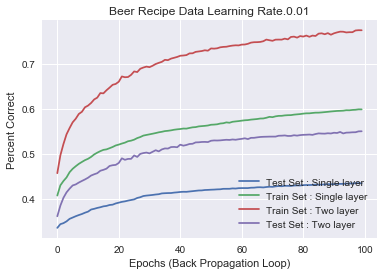

In [6]:
learningRates=[.01]
for i in learningRates:
    runNNs(X_train_with_Cluster, X_test_with_Cluster, y_train, y_test,num_classes,num_features+1,"Beer Recipe Data Learning Rate.",100,i)

In [8]:
X_train, X_test, y_train, y_test= loadWine()
transformer = FactorAnalysis(n_components=3)

faComponents =transformer.fit_transform(X_train)
X_train = pd.DataFrame(data = faComponents,index=X_train.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])
faComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = faComponents,index=X_test.index
             , columns = ['FA component 1', 'FA component 2','FA component 3'])

num_features = X_train.shape[1]
num_classes = 10
gmm = GaussianMixture(n_components=8)
gmm.fit(X_train)
y_gmm = gmm.predict(X_train)
# with Clusters
X_train_with_Cluster=X_train.copy()
X_train_with_Cluster["Cluster"] = y_gmm
y_gmm = gmm.predict(X_test)
X_test_with_Cluster=X_test.copy()
X_test_with_Cluster["Cluster"]=y_gmm

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


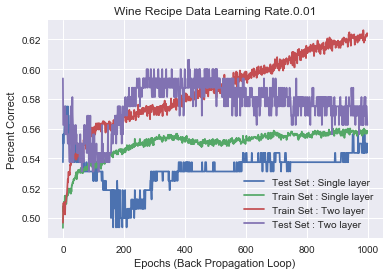

In [10]:
learningRates=[.01]
for i in learningRates:
    runNNs(X_train_with_Cluster, X_test_with_Cluster, y_train, y_test,num_classes,num_features+1,"Wine Recipe Data Learning Rate.",1000,i)